In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math


Bad key "text.kerning_factor" on line 4 in
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Preprocessing Data

Read the csv files and estimates the metrics.
EventosManabi.csv is a dataset where you can find the historical records during eathquake.

In [2]:
# Here I load the first file and form a datetime column
eventos= pd.read_csv('C:/Users/User/Downloads/EventosManabi.csv')
eventos['FechaEventoConv']=pd.to_datetime( pd.Series(pd.to_datetime(eventos["FechaEvento"].astype(str)+' '+
                                                                    eventos["Hora"].astype(str)+':00') ) )
eventos= eventos.set_index('FechaEventoConv')

In [3]:
eventos.head(5)

,ID,FechaEvento,Hora,BaseCliente,ProvinciaCliente,CantonCliente,CiudadCliente,ParroquiaCliente,LatitudCliente,LongitudCliente,BaseEvento,NombreSitioEvento,ProvinciaEvento,CantonEvento,CiudadEvento,ParroquiaEvento,LatitudEvento,LongitudEvento,CantidadClientes
FechaEventoConv,,,,,,,,,,,,,,,,,,,
2016-04-16 17:00:00,1,2016-04-16,17,50913,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.037670,-80.4680,52064,CDLA_AURORA,MANABI,MANTA,MANTA,MANTA,-0.981686,-80.7053,1
2016-07-16 14:00:00,2,2016-07-16,14,40574,LOS RIOS,QUEVEDO,QUEVEDO,QUEVEDO,-1.021810,-79.4676,16144,VIA_SAN_MATEO,MANABI,MANTA,MANTA,MANTA,-0.957225,-80.7808,1
2016-07-17 15:00:00,3,2016-07-17,15,11308,PICHINCHA,QUITO,QUITO,CONOCOTO,-0.289892,-78.4771,51091,ERD_48_PORTOVIEJO_SUR_OESTE,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.076860,-80.4544,1
2016-04-16 17:00:00,4,2016-04-16,17,52995,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.047240,-80.4718,48262,CDLA_COMERCIO_PORTOVIEJO,MANABI,PORTOVIEJO,PORTOVIEJO,PORTOVIEJO,-1.054810,-80.4667,1
2016-07-15 05:00:00,5,2016-07-15,5,40018,AZUAY,CUENCA,CUENCA,CUENCA,-2.893350,-79.0022,18753,BAHIA_CENTRO,MANABI,SUCRE,BAHIA DE CARAQUEZ,BAHIA DE CARAQUEZ,-0.605561,-80.4261,1


In [4]:
# Number of Active Users
df_clientes= pd.DataFrame(eventos['CantidadClientes'].resample('H').sum())

# Number of number of active communication towers
df_torres= pd.DataFrame(eventos['CantidadClientes'].resample('H').count())


Here, I show a general analysis using records behavior and communication towers. I separated the graph into 2 parts: During the earthquake and after this. Records behavior is based in user records and communication towers in the active towers.
April 15 to 18 corresponds to the period during the earthquake, while July 15 to 17 belong earthquake later period.


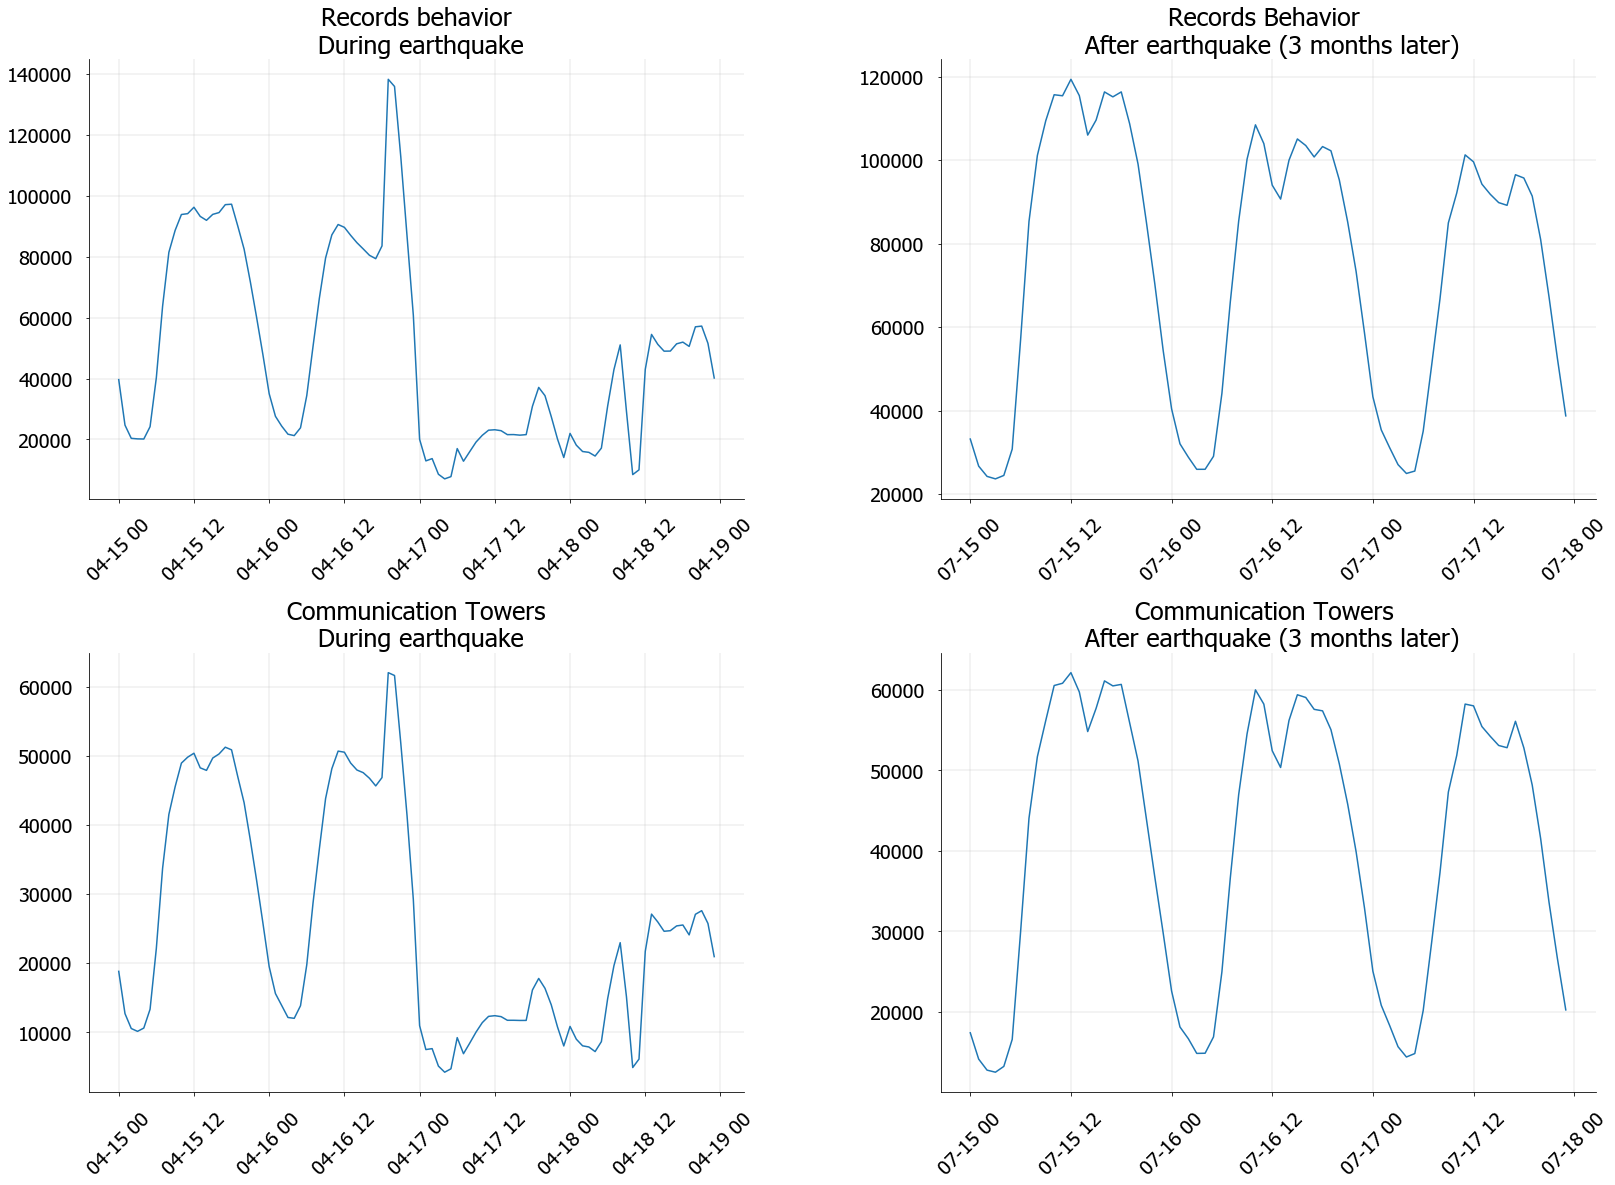

In [5]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, ((ax1, ax2), (ax3, ax4))=  plt.subplots(2, 2, sharex=False, sharey= False, figsize=(27,19),gridspec_kw=dict( wspace=0.3,hspace=0.35)) 

spine= [ax1, ax2, ax3, ax4]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)
    
ax1.plot(df_clientes.reset_index()[df_clientes.reset_index().FechaEventoConv < '2016-04-19'].set_index('FechaEventoConv'))
ax1.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax1.tick_params(axis= 'x', rotation=45)
ax1.grid(linewidth=0.3)
ax1.set_title("Records behavior\n During earthquake",size=25)

ax2.plot(df_clientes.reset_index()[df_clientes.reset_index().FechaEventoConv >= '2016-07-15'].set_index('FechaEventoConv'))
ax2.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax2.tick_params(axis= 'x', rotation=45)
ax2.grid(linewidth=0.3)
ax2.set_title("Records Behavior \n After earthquake (3 months later)",size=25)

ax3.plot(df_torres.reset_index()[df_torres.reset_index().FechaEventoConv < '2016-04-19'].set_index('FechaEventoConv'))
ax3.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax3.tick_params(axis= 'x', rotation=45)
ax3.grid(linewidth=0.3)
ax3.set_title(" Communication Towers \n During earthquake",size=25)

ax4.plot(df_torres.reset_index()[df_torres.reset_index().FechaEventoConv >= '2016-07-15'].set_index('FechaEventoConv'))
ax4.tick_params(axis='both', which='major', pad=13,labelsize=20)
ax4.tick_params(axis= 'x', rotation=45)
ax4.grid(linewidth=0.3)
ax4.set_title("Communication Towers \n After earthquake (3 months later)",size=25)

#plt.savefig('All_data.png', bbox_inches='tight', dpi=100)
plt.show()

## Separate data in two stages for user records

In [6]:
# Create dataframe by cantons for user records
cant_users= pd.DataFrame(eventos.groupby(['CantonEvento'])['CantidadClientes'].resample('H').sum()).reset_index()
datcanton= [ cant_users[cant_users.CantonEvento== f ].reset_index().CantidadClientes 
            for f in sorted(list(set(cant_users.CantonEvento)) ) ]

# Concate all dataframes of every canton for user records
df_by_cant = pd.concat(datcanton, axis=1).set_index(df_clientes.index)
df_by_cant.columns= sorted(list(set(cant_users.CantonEvento)) )

# Separate dataframe by cantons for user records in two stages: During the earthquake and after this.
bef_cant_user= df_by_cant[df_by_cant.index <'2016-04-19']
aft_cant_user= df_by_cant[df_by_cant.index >= '2016-07-15']

## Separate data in two stages for Active towers

In [7]:
# Create dataframe by cantons for Active Towers
cant_tower= pd.DataFrame(eventos.groupby(['CantonEvento'])['CantidadClientes'].resample('H').count()).reset_index()
datcanton_tower= [ cant_tower[cant_tower.CantonEvento== f ].reset_index().CantidadClientes 
            for f in sorted(list(set(cant_tower.CantonEvento)) ) ]

# Concate all dataframes of every canton for Active Towers
df_by_cant_tower = pd.concat(datcanton_tower, axis=1).set_index(df_clientes.index)
df_by_cant_tower.columns= sorted(list(set(cant_tower.CantonEvento)) )

# Separate dataframe by cantons for user records in two stages: During the earthquake and after this.
bef_cant_tower= df_by_cant_tower[df_by_cant_tower.index <'2016-04-19']
aft_cant_tower= df_by_cant_tower[df_by_cant_tower.index >= '2016-07-15']

## Concentration Index

Herfindahl Index is a indicator that reports on the economic concentration of a market and presents the following formulation:

$$
HI = \sum_{i=1}^N S_i^2
$$

Where $S_i$ represents the market share of a company $i$. And $\Large S_i=\frac{Sales_i}{TotalSales}$, $Sales_i$ represents the sales of a company $i$ and $TotalSales$ is the total market sales.

Based on the previous, I propose a metric similar to Herfindahl Index. Moreover, this metric is based on user records, It's calculated for each hour of every day and has following formulation:

$$
CI_{ijt} = \frac{User Records_{ijt}}{Total User Records_{it}}
$$

Where:

* $i:$ this subscript represents Manabi cantons
* $j:$ this subscript represents the hour of day $t$ 
* $t:$ this subscript represents one day
* $User Records_{ijt}:$  is the total number of clients of the canton $i$ in the hour $j$ of the day $t$
* $Total User Records_{t}:$ is the total number of clients of the canton $i$ in the day $t$

In fact, this metric is normalized by the total number of clients of the canton $i$ in the day $t$ and It's calculated for each  Manabi cantons.




In [8]:
# Function created to estimate Concentration Index by Canton
def CI(data, listaDay):
    final_listadf=[]
    for days in listaDay:
        day_df= data[data.index.day ==days].div( (data.resample('D').sum()[data.resample('D').sum().
                                                                           index.day == days].values[0]).tolist(), axis=1 )
        final_listadf.append(day_df)
    return round(pd.concat(final_listadf, axis=0),3)
        

These dataframes have the Concentration Index by Canton in every hour of the day.

In [9]:
conc_index_bef= CI(bef_cant_user, [15,16,17,18])
conc_index_aft= CI(aft_cant_user, [15,16,17])

Here, I load a dataset about population by canton in 2016

In [20]:
pob= pd.read_excel('C:/Users/User/Desktop/Earthquake EC/Data/proyeccion_cantonal.xlsx').sort_values(by='canton')

## Concentration Index of most and least populated cantons during earthquake

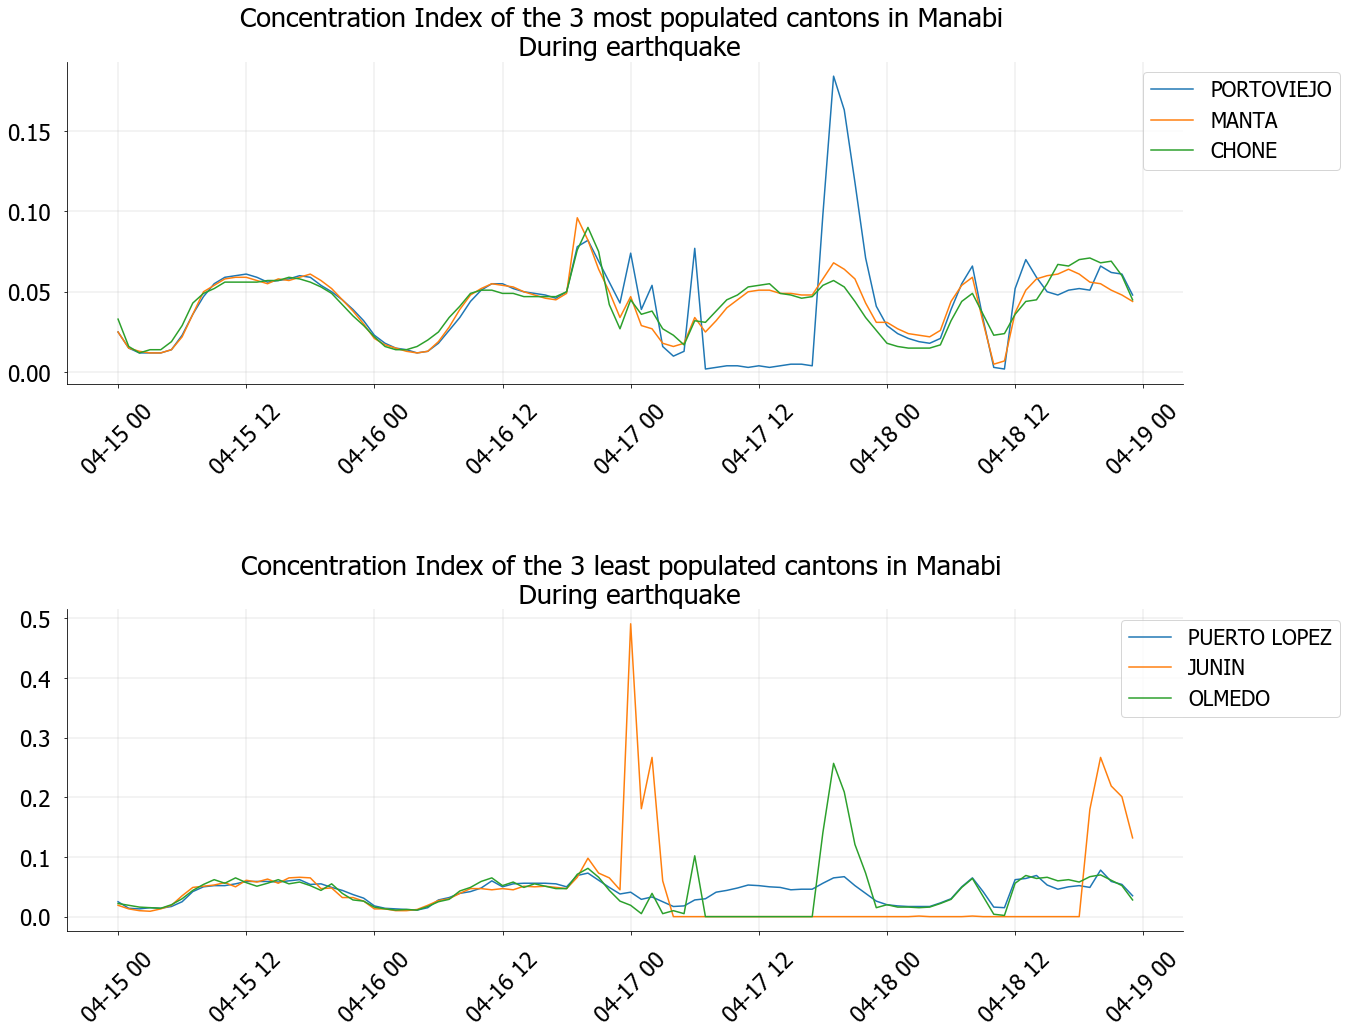

In [58]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1, ax2)=  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(20,16),gridspec_kw=dict( wspace=0.3,hspace=0.7)) 

top_pob= list(pob.sort_values(by='ano2016',ascending=False).head(3).canton)
tail_pob= list(pob.sort_values(by='ano2016',ascending=False).tail(3).canton)

col= ['tab:blue','tab:orange','tab:green','tab:purple','tab:red']

spine= [ax1, ax2]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)

for id_lab, prov in enumerate(top_pob):
    ax1.plot(conc_index_bef[prov], label= prov, color=col[id_lab])
    ax1.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax1.tick_params(axis= 'x', rotation=45)
    ax1.grid(linewidth=0.3)
    ax1.set_title("Concentration Index of the 3 most populated cantons in Manabi \n During earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax1.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
for id_lab, prov in enumerate(tail_pob):
    ax2.plot(conc_index_bef[prov], label= prov, color=col[id_lab])
    ax2.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax2.tick_params(axis= 'x', rotation=45)
    ax2.grid(linewidth=0.3)
    ax2.set_title("Concentration Index of the 3 least populated cantons in Manabi \n During earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax2.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
plt.savefig('C:/Users/User/Desktop/Earthquake EC/Graphs/CI_bef_top3.png', bbox_inches='tight', dpi=100)
plt.show()

## Concentration Index of most and least populated cantons after earthquake

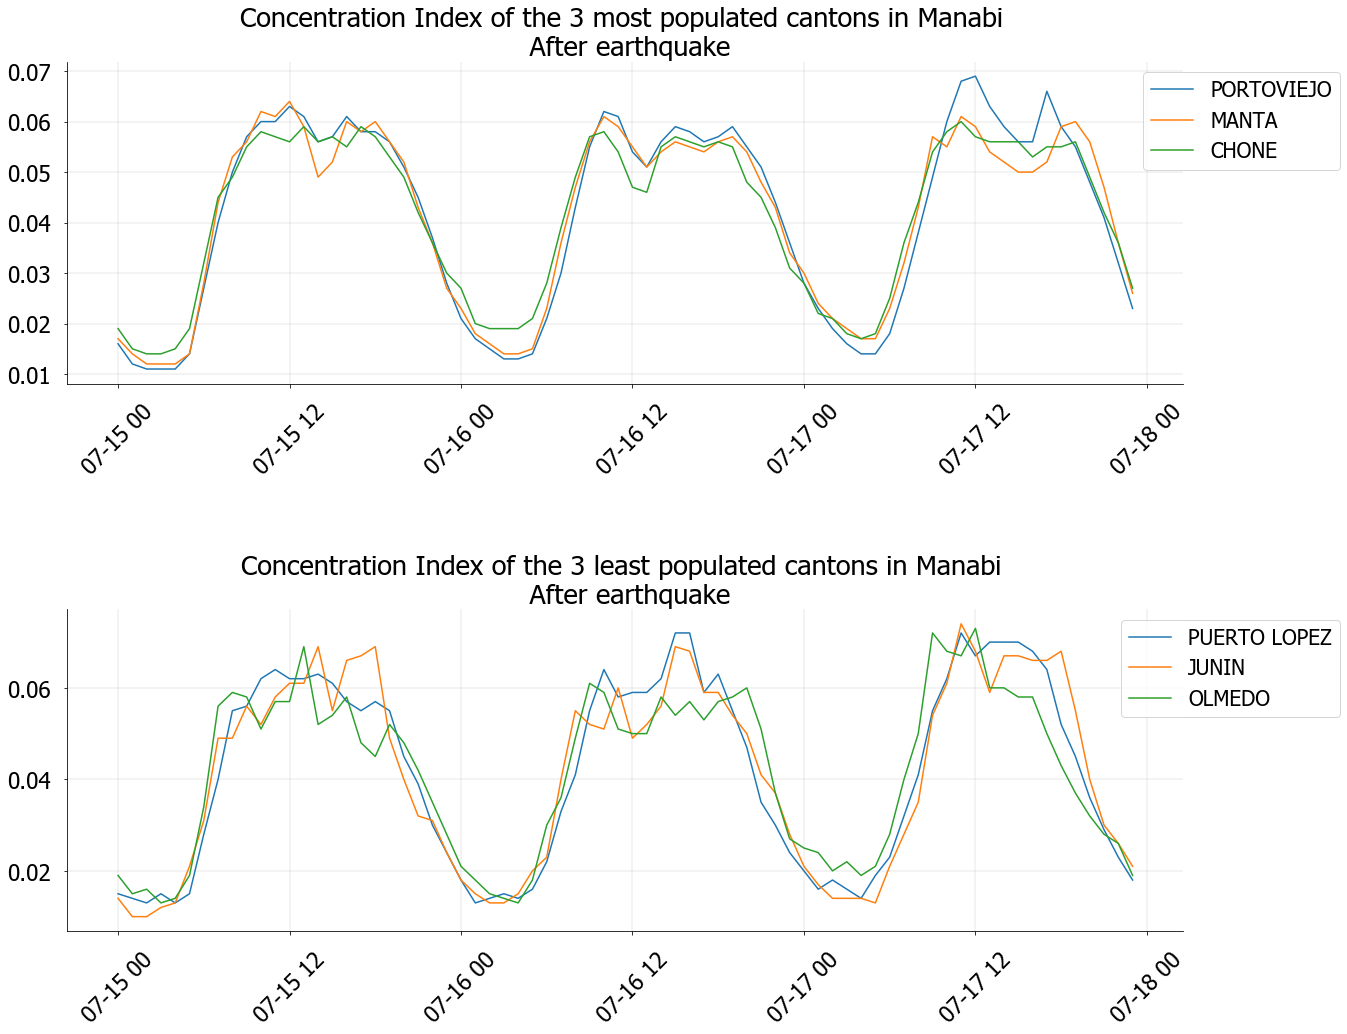

In [60]:
plt.rcParams ['font.family'] = 'Tahoma'
fig, (ax1, ax2)=  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(20,16),gridspec_kw=dict( wspace=0.3,hspace=0.7)) 

top_pob= list(pob.sort_values(by='ano2016',ascending=False).head(3).canton)
tail_pob= list(pob.sort_values(by='ano2016',ascending=False).tail(3).canton)

col= ['tab:blue','tab:orange','tab:green','tab:purple','tab:red']

spine= [ax1, ax2]
for spi in spine:
    spi.spines["top"].set_visible(False)
    spi.spines["right"].set_visible(False)

for id_lab, prov in enumerate(top_pob):
    ax1.plot(conc_index_aft[prov], label= prov, color=col[id_lab])
    ax1.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax1.tick_params(axis= 'x', rotation=45)
    ax1.grid(linewidth=0.3)
    ax1.set_title("Concentration Index of the 3 most populated cantons in Manabi \n After earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax1.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
for id_lab, prov in enumerate(tail_pob):
    ax2.plot(conc_index_aft[prov], label= prov, color=col[id_lab])
    ax2.tick_params(axis='both', which='major', pad=13,labelsize=22.5)
    ax2.tick_params(axis= 'x', rotation=45)
    ax2.grid(linewidth=0.3)
    ax2.set_title("Concentration Index of the 3 least populated cantons in Manabi \n After earthquake",size=27)
    legend_x = 1.15
    legend_y = 1
    ax2.legend(loc='best',prop={'size': 21},bbox_to_anchor=(legend_x, legend_y),ncol=1)
    
plt.show()